In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
plt.rcParams['figure.figsize'] = [8, 6]

# $\star$ Question 1:
Load the points from regression.npz. 

Estimate the weight parameters using m<sup>th</sup> order polynomials as basis functions using the MLestimator. 

Numpy has various tools to invert matrices or to compute SVDs.

Plot the points together with the mean prediction. See how the outcome
changes as you change m.

In [140]:
# Since no info is given, load the file and check what it contains
file = np.load("../data/regression.npz")
file.files

['arr_0']

In [141]:
# Load the data and check shape
data = file['arr_0']
data.shape

(20, 2)

In [142]:
# Inspect the first couple of columns
data[:5, :]

array([[0.8 , 0.12],
       [0.85, 0.14],
       [0.15, 0.45],
       [0.9 , 0.31],
       [0.98, 0.28]])

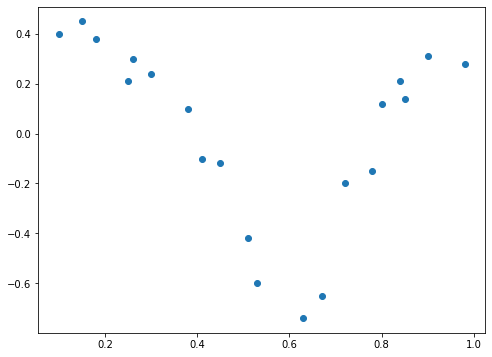

In [143]:
# Since no info is given assume that the first column are the feature samples and the second
# column are the targets
# Plot the points
plt.scatter(data[:, 0], data[:, 1])

In [144]:
# Get the dimensions
n_points = data.shape[0]
n_features = 1

# Get the features
features = data[:, 0]

# Get the targets
target = data[:, 1]

# Create the basis function matrix 
first_col = np.ones((n_points))
second_col = features
third_col = features ** 2
forth_col = features ** 3

# Stack the arrays along the columns dimension
phi_second = np.stack((first_col, second_col, third_col), axis=1)
phi_third = np.stack((first_col, second_col, third_col, forth_col), axis=1)


# Calculate the weights
w_ml_second = np.linalg.pinv(phi_second) @ target
w_ml_third = np.linalg.pinv(phi_third) @ target

# Reshape weights and features for convenient numpy operations
w_ml_second = w_ml_second.reshape(-1, 1)
w_ml_third = w_ml_third.reshape(-1, 1)
features = features.reshape(-1, 1)

# Print the weights
w_ml_second, w_ml_third

(array([[ 1.17789808],
        [-5.28356955],
        [ 4.62568993]]),
 array([[ 0.75099085],
        [-1.67182518],
        [-3.27712066],
        [ 4.93983806]]))

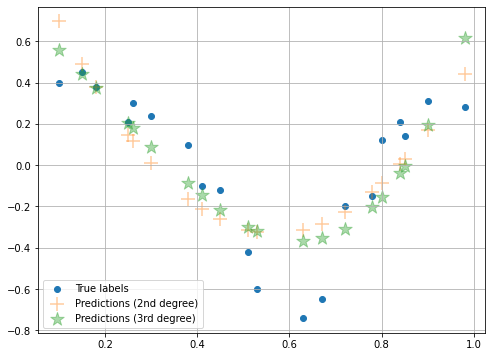

In [145]:
# Create the predictions
preds_second = phi_second @ w_ml_second
preds_third = phi_third @ w_ml_third

plt.scatter(features, target, label="True labels")
plt.scatter(features, preds_second, label="Predictions (2nd degree)", marker="+", s=200, alpha=0.4)
plt.scatter(features, preds_third, label="Predictions (3rd degree)", marker="*", s=200, alpha=0.4)
plt.legend()
plt.grid()

# $\star$ Question 2:

Estimate the weights using the MAP estimator with the Gaussian prior
from this class (ridge regression).

Plot the points together with the mean prediction and the variance in the style of slide 14. 

See what happens as you use fewer and fewer points to estimate the weights.

Also see what happens as you change the hyperparameter and the order of the
polynomial m. When must be large, when can it be chosen smaller?

In [159]:
# MAP approach assuming isotropic gaussian with zero mean
# Using 3rd degree polynomial, a = 0.05, b = 0.3
# Create temp variable for convenience
phi = phi_third.copy()

S_n = 0.05 * np.eye(4) + phi.T @ phi
m_n = np.linalg.inv(S_n) @ phi.T @ target

# Print mean
m_n

array([ 0.62299963, -2.09029759,  0.00798264,  1.8595712 ])

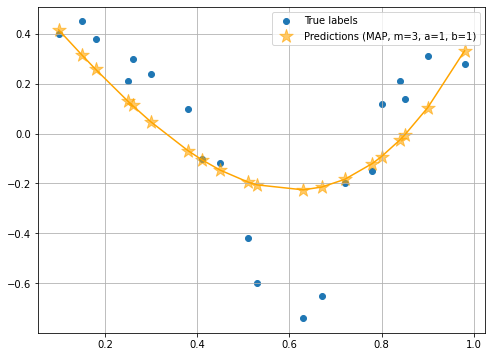

In [160]:
# Predict
preds = phi @ m_n

# In order to draw a line, sort the features
sorted_features = np.sort(features[:, 0])

# Get the sorted indeces
indx = features[:, 0].argsort()

# Sort the predictions based on the indices
sorted_preds = preds[indx]

# Calculate variance
var = 1/0.3 + phi.T @ np.linalg.inv(S_n) @ phi  # shape (20 x 20)

# Plot the predictions 
plt.scatter(features, target, label="True labels")
plt.scatter(features, preds, label="Predictions (MAP, m=3, a=0.05, b=0.3)", marker="*", s=200, alpha=0.6, color="orange")
plt.plot(sorted_features, sorted_preds, color="orange")
plt.legend()
plt.grid()

# $\star \star \star$ Question 3:
Find the optimum hyperparameters using the evidence approximation. 
It is not that hard. You know EM and you know how to
estimate the weight parameters. Just combine these two. 